In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [53]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\한국산업인력공단_직업방송 동영상 프로그램 목록\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\한국산업인력공단_직업방송 동영상 프로그램 목록\\한국산업인력공단_직업방송 동영상 프로그램 목록_20220929.csv']

In [54]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,제작연도,카테고리,프로그램명,총편수,회차제목,내용,시간(러닝타임),장르구분,등록일
0,2016,교양/다큐,강의쇼 청산유수,720,강의쇼 청산유수_1,"마이크임팩트 한동헌 대표, 청춘의 질문 '나는 누구인가'",60min,토크-쇼,2016-04-04
1,2016,교양/다큐,강의쇼 청산유수,720,강의쇼 청산유수_2,"마이크임팩트 한동헌 대표, 청춘의 에너지가 창업 노하우",60min,토크-쇼,2016-04-05
2,2016,교양/다큐,강의쇼 청산유수,720,강의쇼 청산유수_3,"위메이크 프라이스 박유진 홍보실장, 사람을 움직이는 말",60min,토크-쇼,2016-04-06
3,2016,교양/다큐,강의쇼 청산유수,720,강의쇼 청산유수_4,"위메이크 프라이스 박유진 홍보실장, 프레젠테이션 필살기",60min,토크-쇼,2016-04-07
4,2016,교양/다큐,강의쇼 청산유수,720,강의쇼 청산유수_5,"조엘글로벌컨설팅 김조엘 대표, 해외 취업의 모든 것",60min,토크-쇼,2016-04-08


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28187 entries, 0 to 28186
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작연도      28187 non-null  int64 
 1   카테고리      25381 non-null  object
 2   프로그램명     28187 non-null  object
 3   총편수       28187 non-null  int64 
 4   회차제목      28187 non-null  object
 5   내용        26665 non-null  object
 6   시간(러닝타임)  28187 non-null  object
 7   장르구분      24813 non-null  object
 8   등록일       28187 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.9+ MB


In [56]:
df.describe()

,제작연도,총편수
count,28187.000000,28187.000000
mean,2014.609891,463.435094
std,4.487928,419.459768
min,2002.000000,1.000000
25%,2011.000000,94.000000
50%,2015.000000,331.000000
75%,2018.000000,734.000000
max,2022.000000,1600.000000


In [57]:
df.describe(include=np.object)

,카테고리,프로그램명,회차제목,내용,시간(러닝타임),장르구분,등록일
count,25381,28187,28187,26665,28187,24813,28187
unique,9,602,14835,17329,15,15,4682
top,취업생생정보,투데이 고용플러스,오늘의 채용정보,오늘의 채용정보,30min,종합구성,2015-03-19
freq,10338,1421,1236,1233,15144,10491,68


In [58]:
df.isnull().sum()

제작연도           0
카테고리        2806
프로그램명          0
총편수            0
회차제목           0
내용          1522
시간(러닝타임)       0
장르구분        3374
등록일            0
dtype: int64

In [59]:
df.fillna('None',inplace=True)

In [60]:
def to_year(x):
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.year

def to_month(x):
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.month

df['연도'] = df['등록일'].apply(to_year)
df['월'] = df['등록일'].apply(to_month)

In [61]:
df['시간(러닝타임)'].unique()

array(['60min', '50min', '55min', '90min', '45min', '30min', '20min',
       '25min', '10min', '40min', '15min', '70min', 'undefined', '35min',
       '3min'], dtype=object)

In [62]:
def time_length(x):
    if x=='undefined':
        return x
    else:
        t = int(re.search(r'[0-9]+',x)[0])
        if t<=30:
            return '30분 이하'
        elif t>30 and t<=60:
            return '30분 초과 60분 이하'
        else:
            return '60분 초과 90분 이하'

df['러닝타임 구분'] = df['시간(러닝타임)'].apply(time_length)
df['시간(러닝타임)'] = df['시간(러닝타임)'].apply(lambda x:int(re.search(r'[0-9]+',x)[0]) if x!='undefined' else 'undefined')

In [91]:
df['총 러닝타임'] = df[['시간(러닝타임)','총편수']].apply(lambda x:x['시간(러닝타임)']*x['총편수'] if x['시간(러닝타임)']!='undefined' else 'undefined',axis=1)

## 시각화

[Text(0.5, 1.0, '제작연도별 분포'), Text(0, 0.5, 'count')]

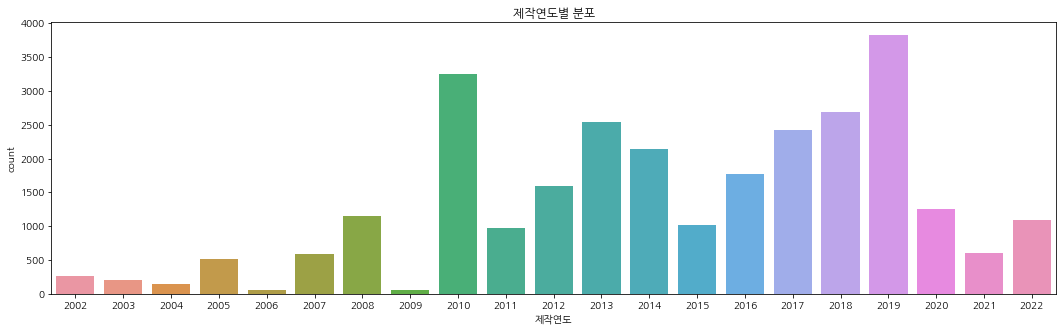

In [43]:
sub_df = df.groupby('제작연도',as_index=False)['내용'].count().sort_values('제작연도')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='제작연도',y='내용').set(title='제작연도별 분포',ylabel='count')

[Text(0.5, 1.0, '등록연도별 분포'), Text(0, 0.5, 'count')]

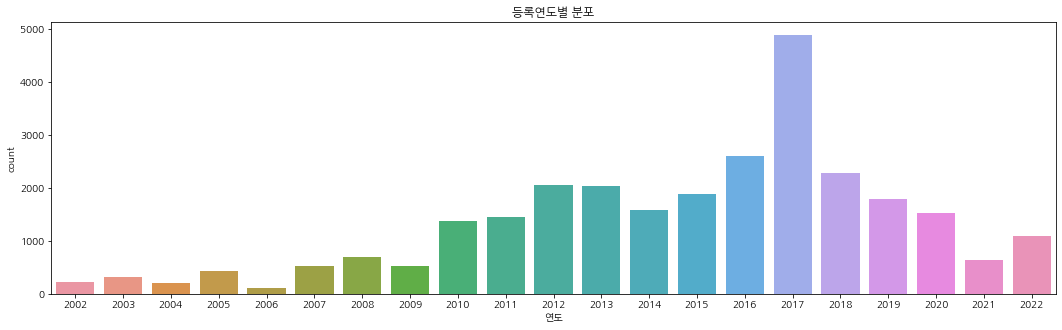

In [42]:
sub_df = df.groupby('연도',as_index=False)['내용'].count().sort_values('연도')
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='연도',y='내용').set(title='등록연도별 분포',ylabel='count')

[Text(0.5, 1.0, '프로그램 편수 분포')]

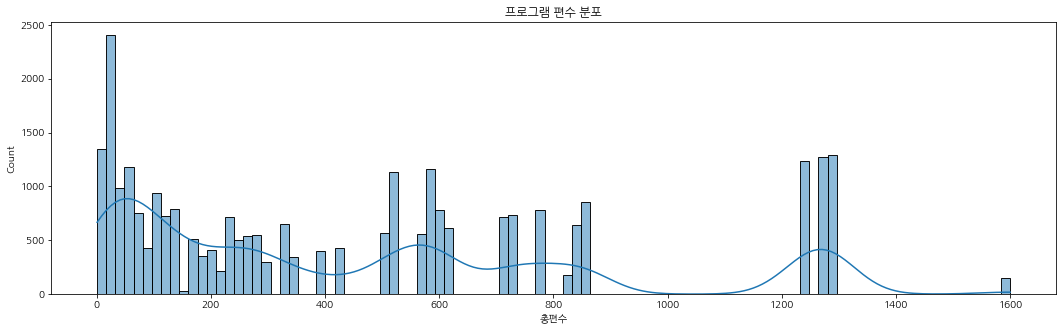

In [36]:
plt.figure(figsize=(18,5))
sns.histplot(data=df,x='총편수',bins=100, kde=True).set(title='프로그램 편수 분포')

[Text(0.5, 1.0, '카테고리별 분포'), Text(0, 0.5, 'count')]

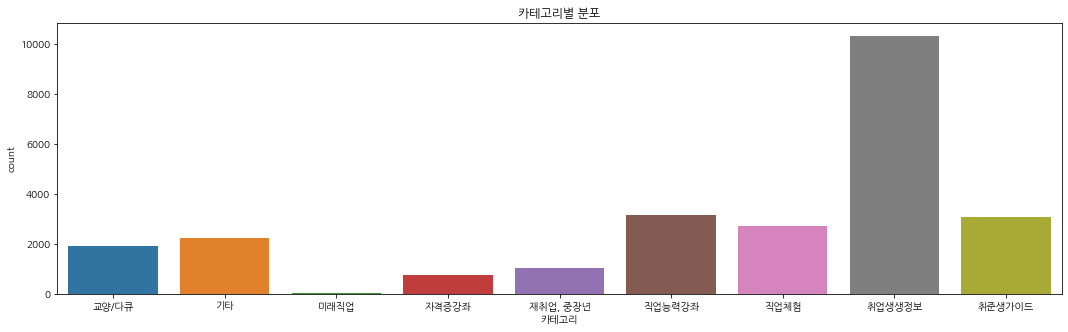

In [41]:
sub_df = df[df['카테고리']!='None'].groupby('카테고리',as_index=False)['내용'].count()
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='카테고리',y='내용').set(title='카테고리별 분포',ylabel='count')

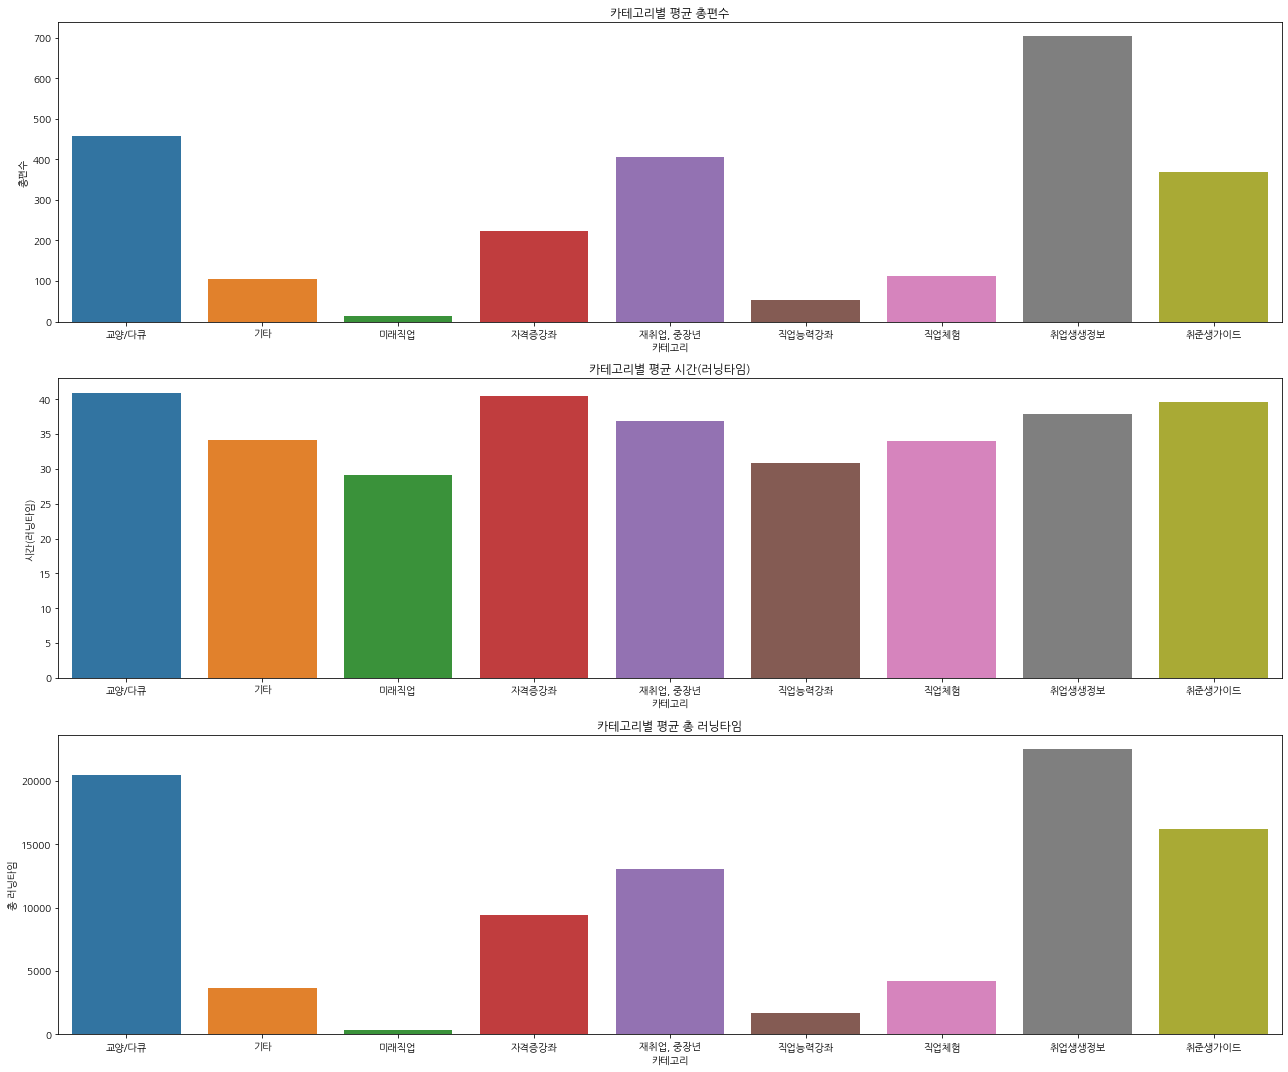

In [95]:
sub_df1 = df[df['카테고리']!='None'].groupby('카테고리',as_index=False)['총편수'].mean()
sub_df2 = df[(df['카테고리']!='None')&(df['시간(러닝타임)']!='undefined')].groupby('카테고리',as_index=False)['시간(러닝타임)'].mean()
sub_df3 = df[(df['카테고리']!='None')&(df['총 러닝타임']!='undefined')].groupby('카테고리',as_index=False)['총 러닝타임'].mean()
fig,axes = plt.subplots(3,1,figsize=(18,15))
sns.barplot(data=sub_df1,x='카테고리',y='총편수',ax=axes[0]).set(title='카테고리별 평균 총편수')
sns.barplot(data=sub_df2,x='카테고리',y='시간(러닝타임)',ax=axes[1]).set(title='카테고리별 평균 시간(러닝타임)')
sns.barplot(data=sub_df3,x='카테고리',y='총 러닝타임',ax=axes[2]).set(title='카테고리별 평균 총 러닝타임')
plt.tight_layout()

<AxesSubplot: ylabel='내용'>

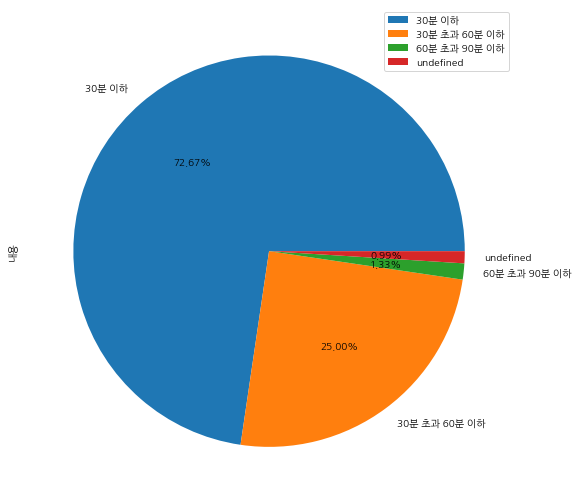

In [67]:
sub_df = df.groupby('러닝타임 구분',as_index=False)['내용'].count()
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df.plot.pie(y='내용',labels=sub_df['러닝타임 구분'].unique(),autopct='%.2f%%',ax=ax)

[Text(0.5, 1.0, '장르구분별 분포'), Text(0, 0.5, 'count')]

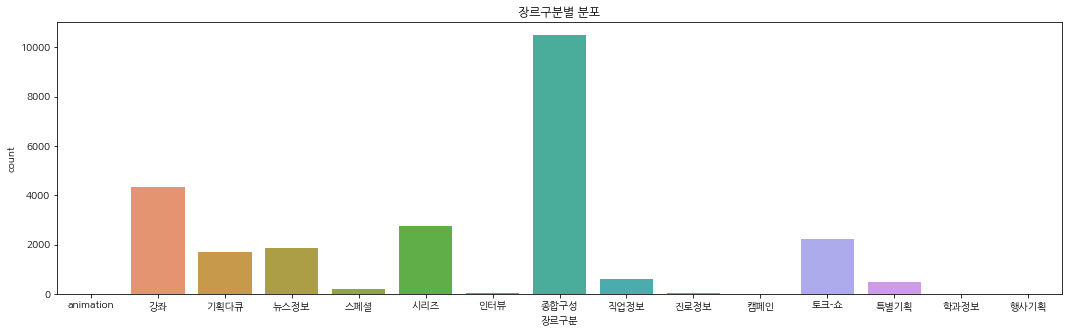

In [97]:
sub_df = df[df['장르구분']!='None'].groupby('장르구분',as_index=False)['내용'].count()
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='장르구분',y='내용').set(title='장르구분별 분포',ylabel='count')

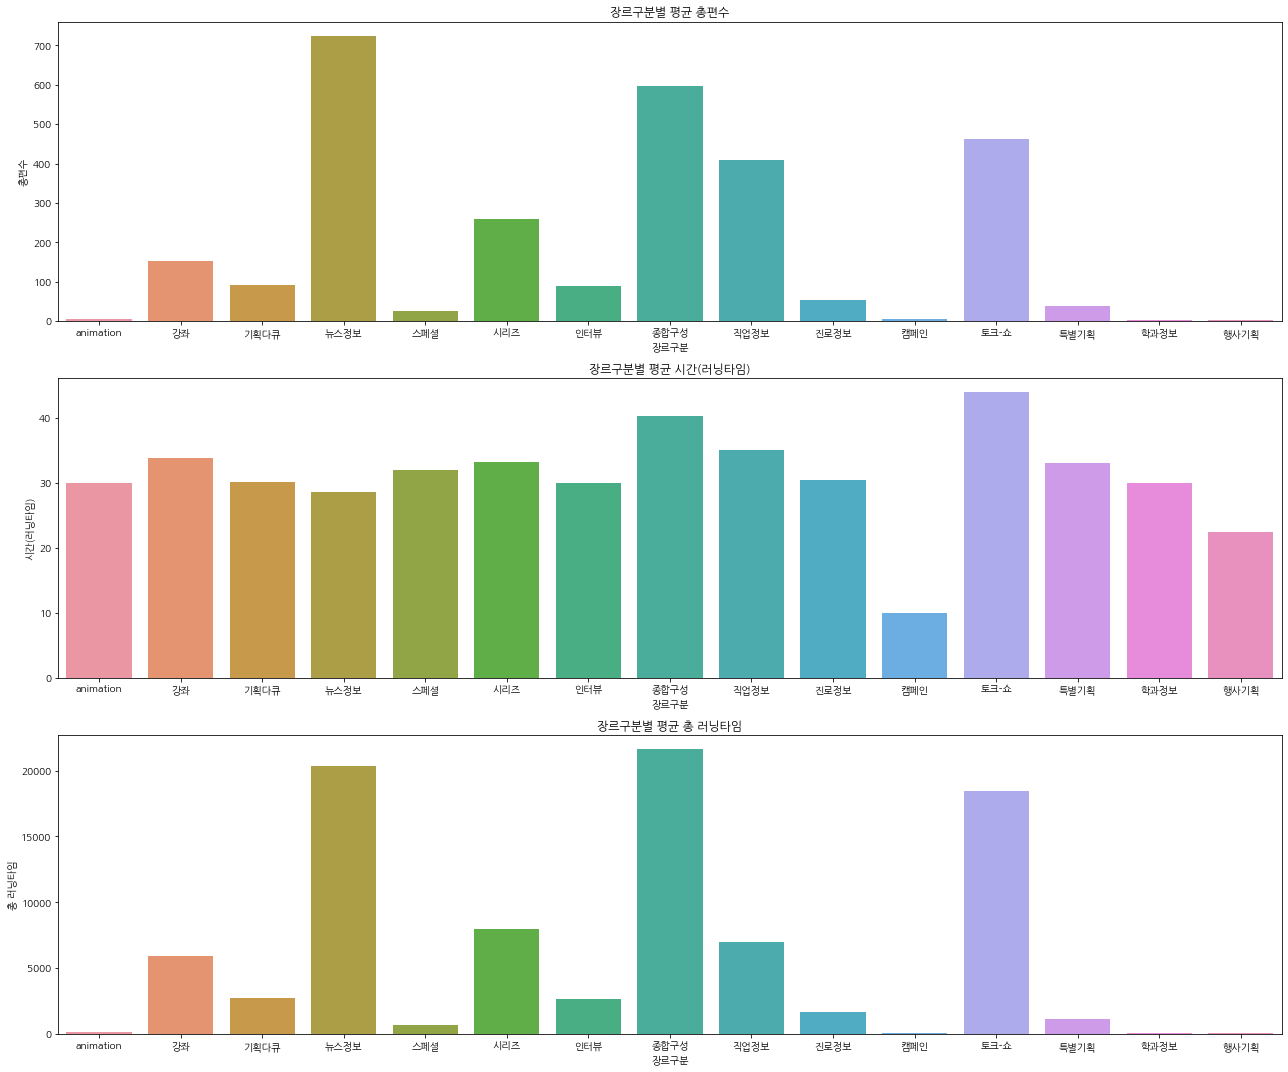

In [96]:
sub_df1 = df[df['장르구분']!='None'].groupby('장르구분',as_index=False)['총편수'].mean()
sub_df2 = df[(df['장르구분']!='None')&(df['시간(러닝타임)']!='undefined')].groupby('장르구분',as_index=False)['시간(러닝타임)'].mean()
sub_df3 = df[(df['장르구분']!='None')&(df['총 러닝타임']!='undefined')].groupby('장르구분',as_index=False)['총 러닝타임'].mean()
fig,axes = plt.subplots(3,1,figsize=(18,15))
sns.barplot(data=sub_df1,x='장르구분',y='총편수',ax=axes[0]).set(title='장르구분별 평균 총편수')
sns.barplot(data=sub_df2,x='장르구분',y='시간(러닝타임)',ax=axes[1]).set(title='장르구분별 평균 시간(러닝타임)')
sns.barplot(data=sub_df3,x='장르구분',y='총 러닝타임',ax=axes[2]).set(title='장르구분별 평균 총 러닝타임')
plt.tight_layout()